# Train accident EDA

In [4]:
import csv
import pandas as pd
import numpy as np
#import folium
import matplotlib.pyplot as plt
import seaborn as sns
# Import folium MarkerCluster plugin
#from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
#from folium.plugins import MousePosition
# Import folium DivIcon plugin
#from folium.features import DivIcon
#import branca.colormap as cm

Load dataset:

[Source](https://safetydata.fra.dot.gov/officeofsafety/publicsite/on_the_fly_download.aspx)

In [6]:
df = pd.read_csv("1512168151216412.csv")

In [293]:
df21 = pd.read_csv("/Users/alex/Downloads/2021_train_accidents.csv")

In [294]:
df21.to_csv('train_df_2021.csv',index=False)

In [295]:
df20 = pd.read_csv("/Users/alex/Downloads/2020_train_accidents.csv")

In [296]:
df20.to_csv('train_df_2020.csv',index=False)

In [297]:
df19 = pd.read_csv("/Users/alex/Downloads/2019_train_accidents.csv")

In [298]:
df19.to_csv('train_df_2019.csv',index=False)

In [398]:
df_hwy = pd.read_csv("/Users/alex/Downloads/2022_Highway_Rail_Accidents.csv")

In [7]:
df = df.reset_index()
df = df.shift(periods=1, axis="columns")
cols = df.columns.tolist()
cs = pd.DataFrame(data = cols)
df.drop(columns = ['DUMMY7','DUMMY1','DIVISION','DUMMY2','DUMMY4','DUMMY5','METHOD','DUMMY6','IYR','index','YEAR4','DUMMY3'],inplace = True)
df.drop(columns = ['HEADEND1','MIDMAN1','MIDREM1','RMAN1','RREM1','HEADEND2','MIDMAN2','MIDREM2','RMAN2','RREM2','LOADF1','LOADP1','EMPTYF1','EMPTYP1','CABOOSE1',\
                   'LOADF2','LOADP2','EMPTYF2','EMPTYP2','CABOOSE2'],inplace = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [253]:
df.to_csv('train_df.csv',index=False)

In [399]:
df_hwy = df_hwy.reset_index()
df_hwy = df_hwy.shift(periods=1, axis="columns")

In [ ]:
# 'INCDTNO': incident number
# 'INCDTNO2': incident number assigned by another involved railroad or entity
# 'INCDTNO3': incident number assigned by the railroad or entity responsible for track maintenance 
# 'ADJUNCT3': rail subdivision name
# 'SUBDIV' : city/town name
# Time is in central time!
# 'YEAR': Year of occurance
# 'MONTH': Month of occurance
# 'DAY': Day of occurance
# 'TIMEHR': Hour of occurance
# 'TIMEMIN': Minute of occurance


In [8]:
df.shape

(2186, 114)

In [9]:
df.head(2)

,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,STCNTY,TOTINJ,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,TYPRR,RRDIV,NARRLEN,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
0,8,KYLE,KYL169022R,NaN,NaN,UP,NaN,22,8,KYLE,KYL169022R,NaN,22,8,23,6,40,PM,1.0,0,0,0,0,SALINA,183,20,85,3.0,1.0,8,R,KYLS,3,2930,1,Y,TRACK 19,1,NaN,2.0,NOKL,833949,16,N,NaN,NaN,0,NaN,40000,0,H704,H702,0,0,0,0,H704,2.0,1,8,40000,20C169,0,0,1.0,0.0,1.0,1.0,6.0,40.0,6.0,40.0,1,6,Cl,NaN,695,0,0,0,0,0,0,SALINE,169,NaN,NaN,N,OTH,000-000-000,KYLE CREW WAS BUILDING AN INBOUND MANIFEST TRA...,DING THEIR TRAIN THE CREW UNKNOWINGLY RAN THRO...,CAR FROM THE HEADEND OF THE TRAIN DERAILED AT ...,YED UPRIGHT AND WAS DRAGGED APPROXIMATELY ONE-...,"NCE IMPACTING THE UNATTENDED LOCOMOTIVE, THE D...",FIFTEENTH (15) CAR FROM THE HEAD END. WITH THE...,ERS BYPASSED CAUSING THE RAIL TO ROLL UNDER AN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38.857806,-97.583678,2.0,5.0,K,NaN,NaN,SALINA
1,10,UP,1022HL001,NaN,NaN,NaN,NaN,22,10,UP,1022HL001,NaN,22,10,2,10,45,PM,1.0,1,1,0,0,COFFEYVILLE,662.64,20,63,4.0,1.0,5,E,YCV5,1,823,7,Y,YARD 008,1,NaN,2.0,MVTX,100742,8,N,NaN,NaN,0,NaN,21018,660,H306,NaN,0,0,0,0,H306,2.0,1,5,27368,20C125,0,0,1.0,0.0,1.0,1.0,4.0,45.0,4.0,45.0,1,6,CL,NaN,590,0,0,0,0,0,0,MONTGOMERY,125,0.0,0.0,N,OTH,000-000-000,THE YCV35-02 WAS SWITCHING IN THE SOUTH YARD W...,THE EMPLOYEE STATES HE WAS IN POSITION ON THE ...,WATCHING THE WRONG TRACK UNTIL HE HEARD THE IM...,"UTH END, INTO A CUT OF CARS IN TRACK 9 TO THE ...","AND MOVING OFF THE TRACK, IT CONTACTED THE CUT...",VER FROM THE FORCE AND CAME TO REST ON CARS IN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,37.027379,-95.624239,2.0,5.0,L,NaN,NaN,WAGONER SUB


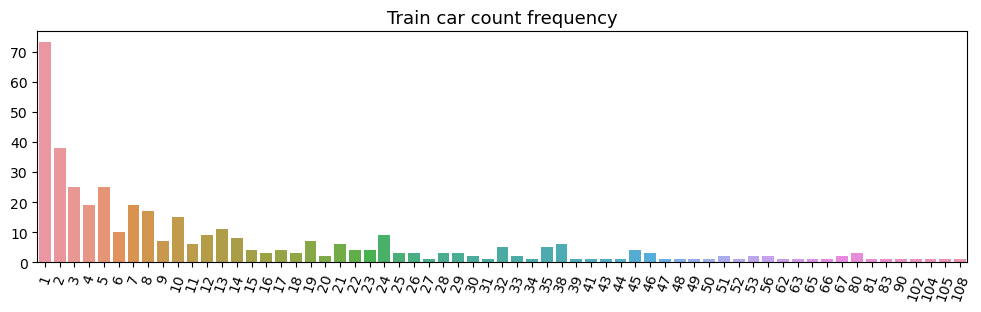

In [13]:
plt.figure(figsize = (12,3))
x = df.CARS.value_counts()[1:110].index
y = df.CARS.value_counts()[1:110].values
plt.xticks(rotation=70)

plt.title('Train car count frequency', fontsize = 13);
sns.barplot(data = df, x = x, y = y,);

View the frequencies of various types of casualties

In [66]:
df.loc[:,['RREMPKLD','RREMPINJ','PASSKLD','PASSINJ','OTHERKLD','OTHERINJ']].value_counts()

RREMPKLD  RREMPINJ  PASSKLD  PASSINJ  OTHERKLD  OTHERINJ
0         0         0        0        0         0           2046
                                                1             39
                                      1         0             28
          1         0        0        0         0             21
          2         0        0        0         0             13
          1         0        0        1         0              4
          0         0        0        2         0              4
                                      0         2              3
                             1        0         0              2
1         0         0        0        0         0              2
0         4         0        0        0         0              2
          2         0        0        0         1              2
          1         0        0        0         1              2
                             2        0         0              2
          0         0        8   

In [15]:
df_clustering = df.loc[:,['RAILROAD','TRNSPD','TONS','PASSTRN','OTHERKLD','OTHERINJ','CARS']]

cause = list(np.zeros(len(df)))

for i in range(len(df)):
    cause[i] = df.CAUSE[i][0]

#print(cause)
df_clustering['Cause'] = cause

### Let us first explore the train companies involved. 

In [20]:
rr_counts.values

array([606, 347, 318, 263,  91,  32,  28,  27,  24,  21,  19,  18,  16,
        14,  12,  11,  11,  11,  10,   9,   8,   7,   7,   7,   7,   6,
         6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   4,
         4,   4,   4,   4,   4,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [27]:
rr_counts = df.RAILROAD.value_counts()
total = rr_counts.sum()
for i,j in zip(rr_counts,rr_counts.index):
    print((str(round(100*(i/total),1))+'%'),j)

27.7% UP
15.9% BNSF
14.5% NS
12.0% CSX
4.2% ATK
1.5% IC
1.3% KCS
1.2% FEC
1.1% WC
1.0% NJTR
0.9% MNCW
0.8% NIRC
0.7% LI
0.6% SEPA
0.5% BLF
0.5% MBTA
0.5% CRSH
0.5% CP
0.5% BRC
0.4% DGNO
0.4% IAIS
0.3% ALS
0.3% GRS
0.3% IHB
0.3% KAW
0.3% PTRA
0.3% LSRC
0.3% EIRR
0.3% AWRR
0.3% SJVR
0.3% GTW
0.3% PATH
0.2% SFRV
0.2% KCT
0.2% IORY
0.2% SKOL
0.2% SERA
0.2% RBMN
0.2% RCPE
0.2% WE
0.2% KRR
0.2% MRL
0.2% FWWR
0.2% TRRA
0.1% MACZ
0.1% WTA
0.1% GDLK
0.1% PW
0.1% UTAH
0.1% NICD
0.1% SLRG
0.1% TASD
0.1% AM
0.1% AZER
0.1% CFRC
0.1% SCXF
0.1% PCMZ
0.1% NYSW
0.1% NOPB
0.1% TPW
0.1% CAGY
0.1% LAS
0.1% DMVW
0.1% MNN
0.1% PGBX
0.1% MCRL
0.1% CDOT
0.1% GSWR
0.1% CIC
0.1% CC
0.1% IANR
0.1% URR
0.1% KYLE
0.1% RWRR
0.1% PHL
0.1% GRW
0.1% NYA
0.1% PAL
0.1% AGR
0.1% CWRY
0.1% SCAX
0.1% TXN
0.1% TMBL
0.1% ESPN
0.1% DL
0.1% IMRR
0.0% MCER
0.0% NECR
0.0% GWR
0.0% PCC
0.0% TCBR
0.0% BPRR
0.0% MNBR
0.0% RCRY
0.0% RVSC
0.0% FGA
0.0% AKMD
0.0% ARS
0.0% RALI
0.0% ACEX
0.0% ARZC
0.0% GNBC
0.0% RLAX
0.0% SGLR
0.0% PCJ

It makes sense to only look at the top 5 railroad companies, as these make up about 80 percent of all the accident records. These being: UP, BNSF, NS, CSX, and ATK. To be sure, we will also consider the net revenue to see if these figures accurately reflect these companies' presense in the US.

| Top 6 railroad companies|Revenue (in dollars)|Frequency in Dataset|
| --- | --- | --- |
|BNSF Railway (BNSF)|23.3 Billion|15.9%|
|Union Pacific Railroad (UP)|21.8 Billion|27.7%|
|CSX Transportation (CSX)|12.5 Billion|12%|
|Canadian National Railway (CN)|11.5 Billion|0%|
|Norfolk Southern Railway (NS)|11.14 Billion|14.5%|
|Amtrack (ATK)|2.1 Billion|4.16%|



It seems like there is close correlation, except that there is no data from Canadian National railway. Also, Amtrack
is significantly lower in revenue than the others, despite being in the top 5 in our dataset. Let's now explore the number of casualties by out top most common railroad companies.

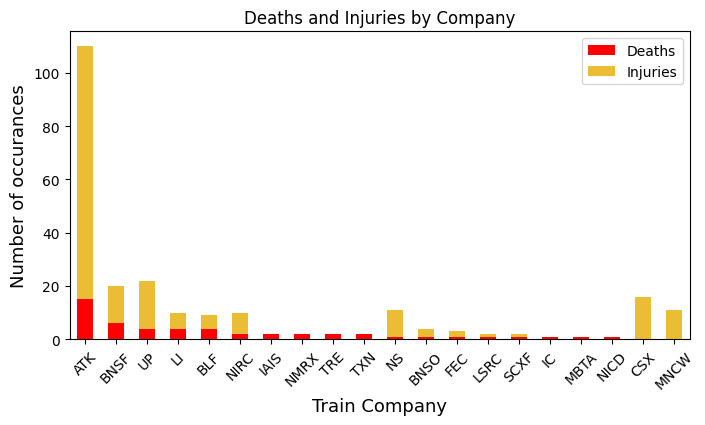

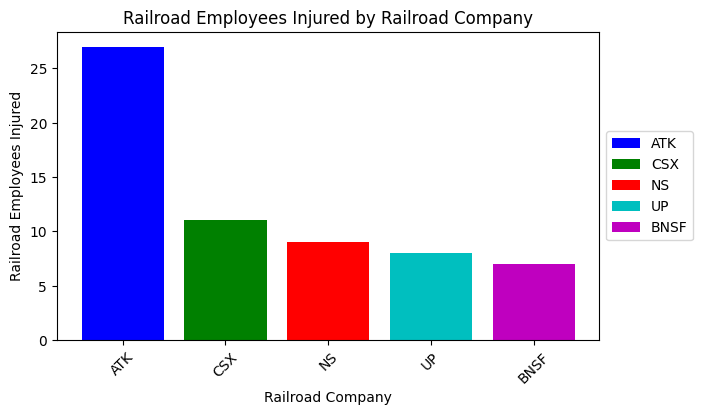

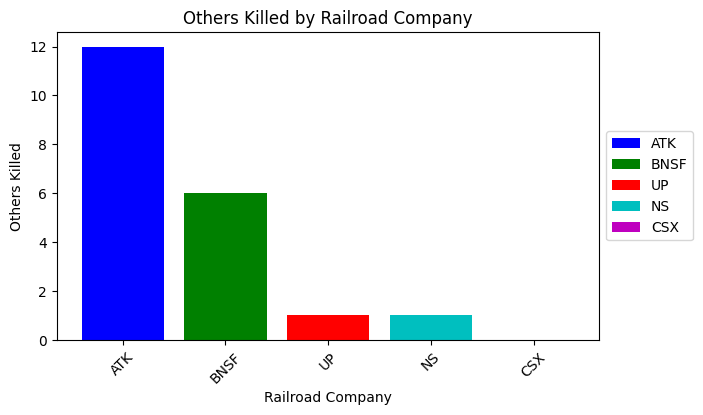

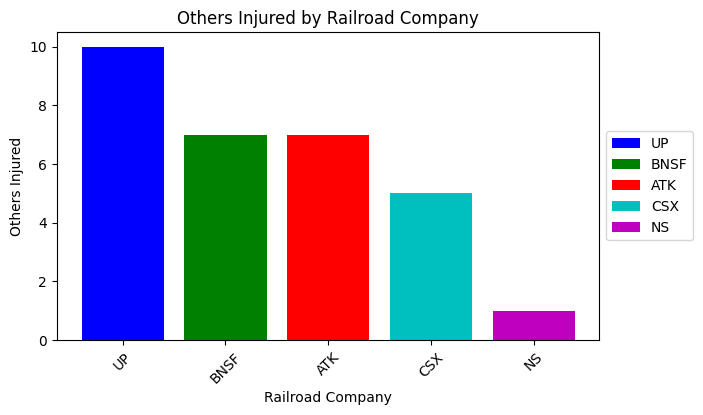

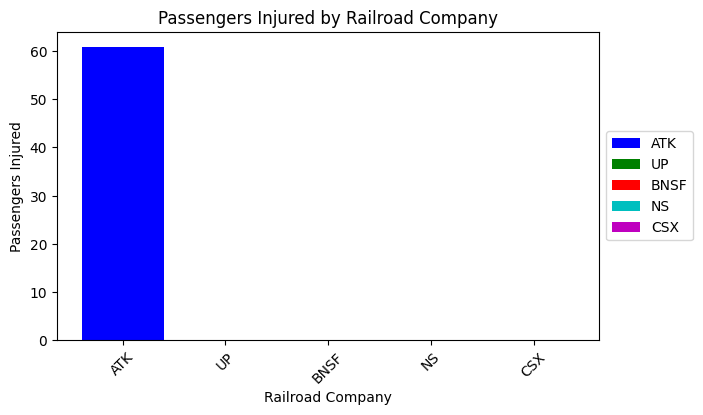

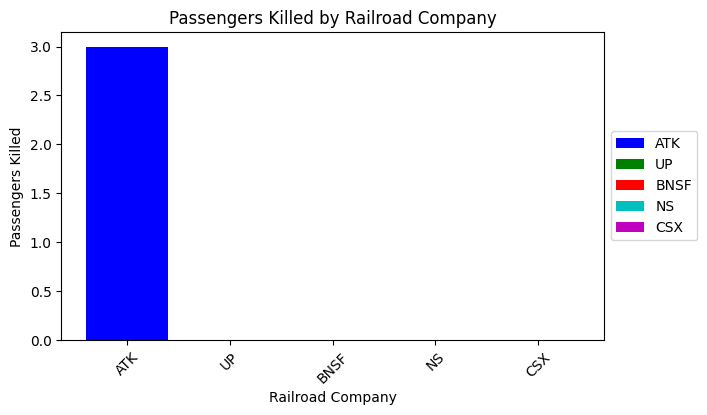

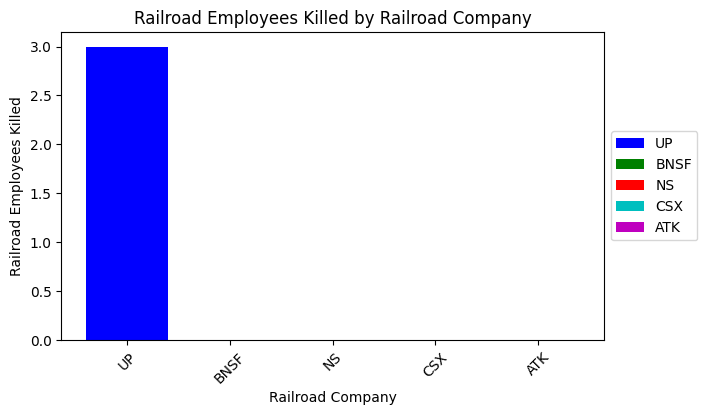

In [38]:
casualty_df = df.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)].loc[:,['TOTKLD','TOTINJ','RAILROAD']].\
groupby('RAILROAD').sum().sort_values(['TOTKLD','TOTINJ'], ascending = False)[:20]

companies = df["RAILROAD"].value_counts()[:5].index.tolist()
tot_injuries = casualty_df['TOTINJ']
tot_deaths = casualty_df['TOTKLD']

casualty_df.plot(kind = 'bar', stacked = True, color = ['red','#ebbd34'],figsize = [8,4]) 
plt.xticks(rotation = 45);
plt.legend(['Deaths','Injuries']);
plt.title("Deaths and Injuries by Company");
plt.xlabel("Train Company",fontsize = 13);
plt.ylabel("Number of occurances",fontsize = 13);
rr = df["RAILROAD"].value_counts()[:5].index.tolist()

for x in ["RREMPINJ","OTHERKLD","OTHERINJ","PASSINJ","PASSKLD","RREMPKLD"]:   
    casualty_cnt = {}

    for c,i in enumerate(rr):

        casualty_cnt[i] = df[df["RAILROAD"] == i][x].sum()

    casualty_cnt = dict(sorted(casualty_cnt.items(), key=lambda item: item[1], reverse = True))
    #print(empinj_cnt,'\n\n')

    plt.figure(figsize = [7,4])
    plt.bar(casualty_cnt.keys(), casualty_cnt.values(), color = ['b','g','r','c','m'], label = casualty_cnt.keys()) #,'y','k','wheat','plum','coral','grey','lime','olive','khaki','navy']
    plt.xticks(rotation = 45)
    rrc = "Railroad Company"
    plt.xlabel(rrc)
    l1 = "Railroad Employees Killed"
    l2 = "Railroad Employees Injured"
    l3 = "Passengers Killed"
    l4 = "Passengers Injured"
    l5 = "Others Killed"
    l6 = "Others Injured"
    
    if x == 'RREMPKLD':
        plt.title(l1+" by "+rrc)
        plt.ylabel(l1)
    if x == 'RREMPINJ':
        plt.title(l2+" by "+rrc)
        plt.ylabel(l2)
    if x == 'PASSKLD':
        plt.title(l3+" by "+rrc)
        plt.ylabel(l3)
    if x == 'PASSINJ':
        plt.title(l4+" by "+rrc)
        plt.ylabel(l4)
    if x == 'OTHERKLD':
        plt.title(l5+" by "+rrc)
        plt.ylabel(l5)
    if x == 'OTHERINJ':
        plt.title(l6+" by "+rrc)
        plt.ylabel(l6)
        
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [47]:
df.loc[:,['RAILROAD', 'PASSTRN']][df['PASSTRN']=='Y'].value_counts()

RAILROAD  PASSTRN
ATK       Y          51
BLF       Y          12
NJTR      Y          12
NIRC      Y          11
SEPA      Y           9
MBTA      Y           8
LI        Y           7
MNCW      Y           3
BNSF      Y           2
NICD      Y           2
SCAX      Y           2
PCMZ      Y           1
TRE       Y           1
SNVX      Y           1
SNJX      Y           1
SFRV      Y           1
ACEX      Y           1
PCJX      Y           1
NMRX      Y           1
MACZ      Y           1
GTW       Y           1
CTHS      Y           1
BNSO      Y           1
UP        Y           1
dtype: int64

It seems like Amtrack has a disproportionately large number of casualties. It has about twice as many railroad employees injured and "others" (not railroad employees or passangers) killed than CSX and BNSF, which come in second, respectively. Amtrack is also the only company to have passangers inured or killed, but this could be explained by the fact that it is the only passenger-only company out of all of these. Let us now see the proportion of passenger to non-passenger trains by company to be sure.

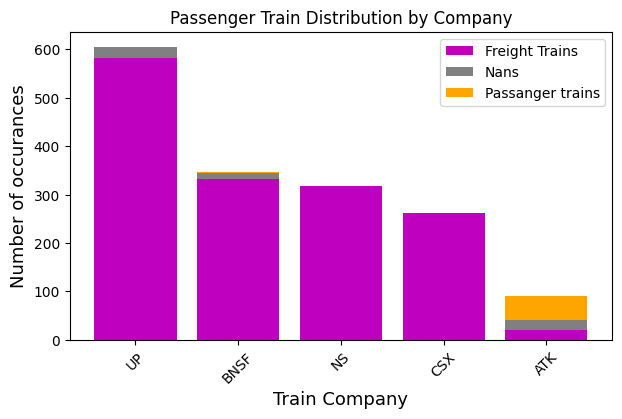

In [426]:
companies = df["RAILROAD"].value_counts()[:5].index.tolist()
pass_cnt_1 = []
npass_cnt_1 = []
nan_cnt_1 = []


for c,i in enumerate(companies):
    tot = len(df[df["RAILROAD"] == i])
    pass_cnt_1.append((df[df["RAILROAD"] == i]["PASSTRN"] == "Y").sum())
    npass_cnt_1.append((df[df["RAILROAD"] == i]["PASSTRN"] == "N").sum())
    nan_cnt_1.append(tot - pass_cnt_1[c] - npass_cnt_1[c])
    
plt.figure(figsize = [7,4]);
plt.bar(companies, npass_cnt_1, color = 'm', label = "Freight Trains");
plt.bar(companies, nan_cnt_1, bottom = npass_cnt_1, color = 'grey', label = "Nans");
plt.bar(companies, pass_cnt_1, bottom = (np.array(npass_cnt_1) + np.array(nan_cnt_1)), color = 'orange', label = "Passanger trains");
plt.xticks(rotation = 45);
plt.legend();
plt.title("Passenger Train Distribution by Company");
plt.xlabel("Train Company",fontsize = 13);
plt.ylabel("Number of occurances",fontsize = 13);

It does indeed seem to be the case that Amtrack is the only passenger train company in the top 5. Now is a good time to explore the causes for railroad accidents. 

Below is a description of Cause Codes.

Source: https://railroads.dot.gov/forms-guides-publications/guides/train-accident-cause-codes

Here, H codes are human factors, T are "Track,Roadbed, and structure", E are mechanical and electrical failures, S is signal communication, and M are miscellaneous. Let's create a pie chart that captures the breakdown of accidents by their category. 

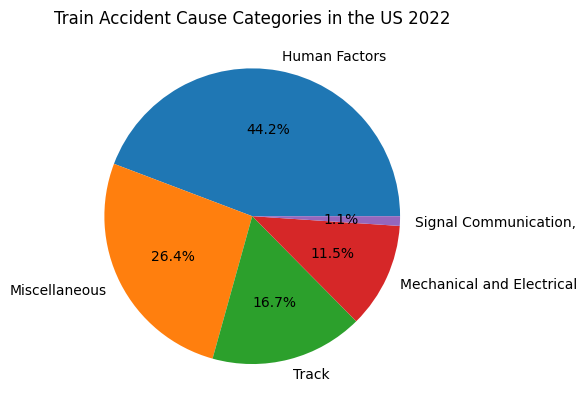

In [18]:
E_codes = 0
H_codes = 0
M_codes = 0
S_codes = 0
T_codes = 0

length = len(df["CAUSE"])

for i in df["CAUSE"]:
    if i[0] == "E":
        E_codes += 1
    if i[0] == "H":
        H_codes += 1
    if i[0] == "M":
        M_codes += 1
    if i[0] == "S":
        S_codes += 1
    if i[0] == "T":
        T_codes += 1

code_portions = [H_codes, M_codes, T_codes, E_codes, S_codes]

# Get the proportions of each code category
for c,i in enumerate(code_portions):
    #print(code_list[c])# =
    code_portions[c] = 100*(i/length)
    
#portions = [100*(i/rr_counts.sum()) for i in rr_counts.values[:10]]
#portions.append(100-np.array(portions).sum())
# RR company names
labels2 = ["Human Factors", "Miscellaneous", "Track", "Mechanical and Electrical", "Signal Communication,"]
# Create pie chart
fig, ax = plt.subplots()
ax.pie(code_portions, labels=labels2, autopct='%1.1f%%');
ax.set_title("Train Accident Cause Categories in the US 2022");

Human factors account for nearly half of these railroad accidents in US for the year 2022, with second leading reason being "Miscellaneous". Let us explore this a little further. We will now look at the top 15 leading causes, and take into account the passenger trains involved.

| Code|Description|Frequency in Dataset|
| --- | :--- | --- |
|**H307**|Shoving movement, man on or at leading end of movement, failure to control|5.2%|
|**H702**|Switch improperly lined|5.1%|
|**M302**|Highway user inattentiveness |4.0%|
|**H306**|Shoving movement, absence of man on or at leading end of movement|3.8%| 
|**H318**|Kicking or dropping cars, inadequate precautions|3.0%|
|**M411**|Passed couplers (automated classification yard)|2.9%|
|**M308**|Highway user deliberately disregarded crossing warning devices |2.7%|
|**H607**|Failure to comply with restricted speed|2.7%|
|**H312**|Passed couplers (other than automated classification yard)|2.6%|
|**T110**|Wide gage (due to defective or missing crossties)|2.1%|
|**M404**|Object or equipment on or fouling track |2.0%|
|**H704**|Switch previously run through |1.6%|
|**H503**|Buffing or slack action excessive, train handling|1.6%|
|**M303**|Highway user misjudgment under normal weather and traffic conditions|1.5%|
|**H302**|Cars left foul|1.5%|



Text(0, 0.5, 'Number of occurances')

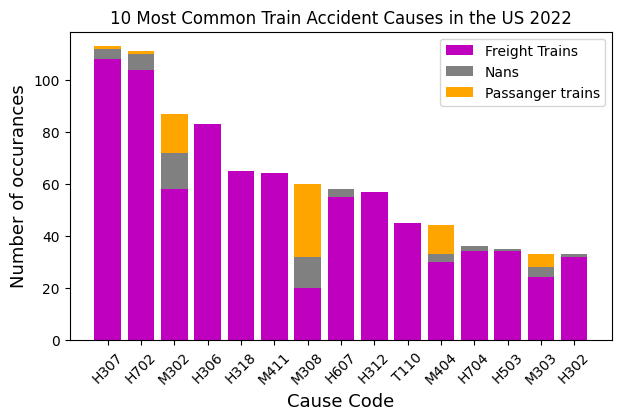

In [391]:
causes = df["CAUSE"].value_counts()[:15].index.tolist()
pass_cnt = []
npass_cnt = []
nan_cnt = []


for c,i in enumerate(causes):
    tot = len(df[df["CAUSE"] == i])
    pass_cnt.append((df[df["CAUSE"] == i]["PASSTRN"] == "Y").sum())
    npass_cnt.append((df[df["CAUSE"] == i]["PASSTRN"] == "N").sum())
    nan_cnt.append(tot - pass_cnt[c] - npass_cnt[c])
    

plt.figure(figsize = [7,4])
plt.bar(causes, npass_cnt, color = 'm', label = "Freight Trains")
plt.bar(causes, nan_cnt, bottom = npass_cnt, color = 'grey', label = "Nans")
plt.bar(causes, pass_cnt, bottom = (np.array(npass_cnt) + np.array(nan_cnt)), color = 'orange', label = "Passanger trains")
plt.xticks(rotation = 45)
plt.legend()
plt.title("10 Most Common Train Accident Causes in the US 2022")
plt.xlabel("Cause Code",fontsize = 13)
plt.ylabel("Number of occurances",fontsize = 13)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It seems like these are mostly made up of 'H' and 'M' codes, as expected based on the pie chart. We also see that M302 and M308 accidents are the most related to passenger trains. These are as follows: **Highway user inattentiveness** and **Highway user deliberately disregarded crossing warning devices**. 

The most common "H" or "Human" causes are those involving **failure to control the locomotive** such that it runs into another train, or **imporoperly lining a switch**.

Next, let us see what the leading causes for deaths and injuries are. Here is a stacked bar plot of frequency vs. cause.

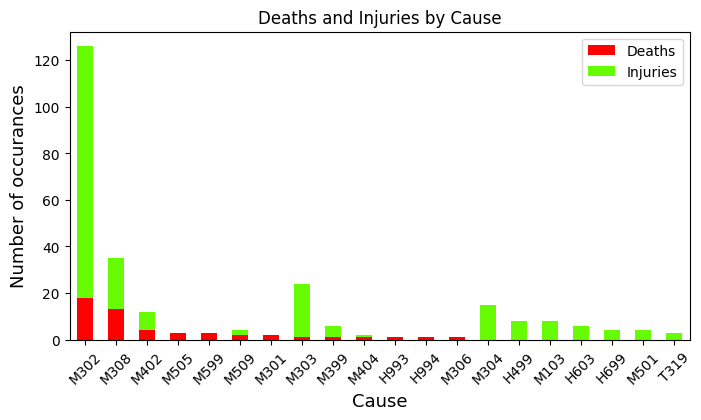

In [13]:
casualty_df = df.loc[(df['TOTINJ'] != 0) | (df['TOTKLD'] != 0)].loc[:,['TOTKLD','TOTINJ','CAUSE']].\
groupby('CAUSE').sum().sort_values(['TOTKLD','TOTINJ'], ascending = False)[:20]

casualty_df.plot(kind = 'bar', stacked = True, color = ['red','#67fc03'],figsize = [8,4]) 
plt.xticks(rotation = 45);
plt.legend(['Deaths','Injuries']);
plt.title("Deaths and Injuries by Cause");
plt.xlabel("Cause",fontsize = 13);
plt.ylabel("Number of occurances",fontsize = 13);

The most common cause is the inattentiveness or deliberate disreguard for railroad crossings on behalf of the "Highway user", or car drivers. This makes sense as this is the reason most correlated with that Amtrack casualties.

Now we want to see if there are any specific accidents that could explain the accident statistics we explored. We explore the descriptions of cases that account for the most casualties. 

There is 1 case that stands out the most, and this is an acccident involving an Amtrack train. According to the dataset, it accounts for 3 passenger deaths, 1 "other" death, 50 passenger injuries, and 12 Rairload employee injuries. After a quick online search, an article of the accident is found, matching these figures. It involved a collision between an Amtrack train and a dumptruck. Three of the 282 people on board have been killed. The dumptruck driver also died.

[News article on the accident](https://www.cnn.com/2022/07/21/us/missouri-amtrak-train-derailment/index.html)

Here is a detailed description of the accident from the dataset:

*"GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/133-E/166 AND 8 CARS STRUCK A LOADED DUMP TRUCK ON THEBNSF MARCELINE SUBDIVISION AT MP 363.876, COUNTY ROAD 113 (DOT #005284Y). THE CROSSING IS EQUIPPEDWITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RESULT, BOTH LOCOMOTIVES DERAILED, AND ALL EIGHT CARS DERAILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE TRUCK DRIVER FATALITY, THREE PASSENGER FATALITIES, ANDVARIOUS INJURIES TO THE MAJORITY OF PASSENGERS THROUGHOUT THE TRAIN."*

Here are some more notable train accidents that occured in 2022:

- A tractor-trailer collided with a passenger train, resulting in 11 injuries (and no deaths, thankfully) in Waterbury, Connecticut. [News article](https://www.wtnh.com/news/train-and-tractor-trailer-collide-in-waterbury/)

Detailed Description:

*"TRAIN 1957 STRUCK A STOPPED TRACTOR TRAILER ON TRACK AT EAGLE STREET CROSSING. "*

- An accident in which a passenger train hit an abandoned vehicle on the tracks and partially derailed. 8 injuries.
[News article](https://www.local10.com/news/local/2022/08/27/6-sent-to-hospital-after-tri-rail-train-slams-into-abandoned-vehicle-partially-derails/)

Detailed Description:

*"TRAIN PP60 WAS HEADING NORTH WHEN ENGINEER NOTICED AN ABANDONED VEHICLE BETWEEN MAIN TRACKS 1 AND 2NORTH OF SISTRUNK CROSSING. THEY STRUCK THE VEHICLE, CAUSING THE TRAIN TO SHIFT THE TRACK, WHICH CAUSED THE TRAIN TO DERAIL THE FIRST TRUCK OF CAB CAR 511 AND THE REAR TRUCK OF LOCOMOTIVE 809. 8 PASSENGERS WERE TRANSPORTED TO BROWARD CENTRAL HOSPITAL."*

- Passenger train collided with maintenance vehicles on the tracks. 7 injuries. [News article](https://www.rtands.com/safety/ntsb-releases-initial-report-on-caltrain-collision-with-hi-rail-vehicles/)

Detailed Description:

*"ON MARCH 10, 2022, AT APPROXIMATELY 10:33 A.M., SOUTHBOUND CALTRAIN 506 STRUCK THREE STATIONARY ON-TRACK MAINTENANCE VEHICLES AT MILEPOST MP 11.6 ON MAIN TRACK 2 IN SAN BRUNO, CALIFORNIA. THE LOCOMOTIVE DERAILED, AND ALL THREE MAINTENANCE VEHICLES WERE DESTROYED. THE THREE HI-RAIL VEHICLES WERE TWOFLATBED TRUCKS WITH TELESCOPIC BOOM CRANES AND A FULL-SIZE, HEAVY-DUTY PICKUP. FUEL FROM THE HI-RAILMAINTENANCE VEHICLES RELEASED AND FUELED A FIRE THAT SPREAD TO ONE OF THE PASSENGER RAIL CARS. FOURTEEN PEOPLE REPORTED INJURIES: 12 PASSENGERS, 1 TRAIN CREW MEMBER, AND 1 MAINTENANCE CONTRACTOR. OFTHESE, SEVEN WERE TRANSPORTED TO LOCAL HOSPITALS, AND SEVEN WERE TREATED AND RELEASED AT THE SCENE.THE WEATHER AT THE TIME OF THE COLLISION WAS CLEAR SKIES, WIND FROM THE NORTH AT 17 MPH, AND A TEMPERATURE OF 60°F."*

In [72]:
rows = df.loc[(df['TOTINJ'] > 5) | (df['TOTKLD'] > 1)].index#df[df.RREMPINJ > 0].index.tolist() #df[df["VISIBLTY"]==4].index.tolist()
for i in rows:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    print(i,df.loc[i,"RAILROAD"],df.loc[i,"CAUSE"],df.loc[i,"TOTKLD"],df.loc[i,"TOTINJ"],'\n',desc,'\n')

413 TXN M402 2 0 
 MOTORIST TRAVELING NB ON THE LOVINGTON HWY (HWY 18) LOST CONTROL OF THEIR VEHICLE, CROSSING SEVERALLANES OF TRAFFIC AND THE RAILROAD ROW BEFORE IMPACTING THE WHEEL OF ON AN EMPTY, CLEAN, TANK CAR.THE MOTOR VEHICLE SUSTAINED SUBSTANTIAL DAMAGE FROM THE IMPACT, AND CAUGHT FIRE, RESULTING IN 2 FATALITIES TO THE DRIVER AND FRONT PASSENGER.  THE INITIAL IMPACT CAUSED ONE SET OF WHEELS TO BE DERAILED ON THE GBRX 710098 (EMPTY TANK CAR), AND FIRE DAMAGE THE OUTER SKINS ON THE GBRX 710075 (EMPTY TANK CAR).  THE 112 CAR TRAIN CONSISTED OF EMPTY STORAGE CARS THAT HAD BEEN SWITCHED OUT, AND WERE BEING PUT BACK ON SPOT.  THE CREW WAS IN THE PROCESS OF CUTTING A CROSSING AT THE REAR END OF THE TRAIN,64 CARS LENGTHS FROM THE POINT OF IMPACT, WHEN THE INCIDENT OCCURRED.  THE ENGINEER WAS IN THE LEADLOCOMOTIVE 48 CAR LENGTHS FROM THE POINT OF IMPACT.  THE INCIDENT DID NOT OCCUR AT A GRADE CROSSING, AND THE CREW WAS UNAWARE THAT THE MOTOR VEHICLE HAD STRUCK THEIR TRAIN.  THE INITIAL 

'GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/133-E/166 AND 8 CARS STRUCK A LOADED DUMP TRUCK ON THEBNSF MARCELINE SUBDIVISION AT MP 363.876, COUNTY ROAD 113 (DOT #005284Y). THE CROSSING IS EQUIPPEDWITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RESULT, BOTH LOCOMOTIVES DERAILED, AND ALL EIGHT CARS DERAILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE TRUCK DRIVER FATALITY, THREE PASSENGER FATALITIES, ANDVARIOUS INJURIES TO THE MAJORITY OF PASSENGERS THROUGHOUT THE TRAIN.'

In [448]:
num = case_nums
start_col = 0

for i in num:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    
    display(i,desc)

while start_col < len(cs):
    stop_col = start_col+10
    display(df.iloc[num,start_col:stop_col])
    start_col = start_col+10



1217

'GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/133-E/166 AND 8 CARS STRUCK A LOADED DUMP TRUCK ON THEBNSF MARCELINE SUBDIVISION AT MP 363.876, COUNTY ROAD 113 (DOT #005284Y). THE CROSSING IS EQUIPPEDWITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RESULT, BOTH LOCOMOTIVES DERAILED, AND ALL EIGHT CARS DERAILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE TRUCK DRIVER FATALITY, THREE PASSENGER FATALITIES, ANDVARIOUS INJURIES TO THE MAJORITY OF PASSENGERS THROUGHOUT THE TRAIN.'

,index,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3
1217,NaN,22,6,ATK,171095,NaN,NaN,NaN,NaN,22


,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN
1217,6,BNSF,CH0622203,NaN,005284Y,22,6,27,12,42


,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE
1217,PM,7.0,0,0,0,0,NaN,MENDON,0363.8,29


,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT
1217,80,2.0,1.0,89,E,4,3,0,2,Y


,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2
1217,MAIN TRACK 2,5,NaN,1.0,AMT,000133,1,NaN,NaN,NaN


,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2
1217,0,NaN,2,0,0,0,0,2,0,0


,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2
1217,0,0,0,8,0,0,0,0,8,0


,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ
1217,0,0,3500000,0,M302,NaN,4,59,4,59


,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD
1217,M302,1.0,5,89,3907000,NaN,29C041,62,0,4


,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION
1217,1.0,0.0,1.0,1.0,3.0,42.0,3.0,42.0,1,6


,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ
1217,NaN,No,NaN,NaN,NaN,469,NaN,2022,0,12


,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN
1217,3,50,1,0,CHARITON,41,NaN,NaN,NaN,Y


,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8
1217,CWR,NaN,"GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/...","BNSF MARCELINE SUBDIVISION AT MP 363.876, COUN...",WITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RES...,AILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE ...,VARIOUS INJURIES TO THE MAJORITY OF PASSENGERS...,NaN,NaN,NaN


,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud
1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.560581,-93.181186


,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
1217,1.0,1.0,J,NaN,NaN,MARCELINE


TOTINJ    73
TOTINJ    53
TOTINJ    35

TOTINJ    172
TOTKLD     1

## Map

Finally, we will use the Latitude and Longitude columns to plot the accidents from this dataset on a map using Folium. The accident locations are labeled with pins with a color scheme that reflects the severity of the accident.  The map will be interactive such that the user can click on the accident pin and view the description for it. There will also be a case number at the top, so any more details could be extracted from the dataset by locating it in the dataframe. 

In [1]:
def map_():
    
    tot_length = len(df)

    cases = tot_length
    description = []

    for i in range(cases):
        desc = ""
        for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
            if isinstance(df[j][i],str):
                if j == "NARR1":
                    desc += "Case number: " + str(i) + ", Total Injuries: " + str(df['TOTINJ'][i])+ ", Total Deaths: " + str(df['TOTKLD'][i]) 
                    desc += (' Description: \n' + df[j][i])
                else:
                    desc += df[j][i]
        description.append(desc)

    case_descriptions = dict(list(enumerate(description)))
    #print(case_descriptions)

    # Folium Map

    length = tot_length
    # Initial the map
    site_map = folium.Map(location= [39.534758, -101.919531], zoom_start=4.45)
    # For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
    name = ""
    colors = ["#f2cf1f","#f2cb1f",'#f28c1f','#f25e1f','#d10202']

    for i in range(length):


        #if df.loc[i,"PASSTRN"] == "Y":
            #color = "#0016d3"
        #elif isinstance(df.loc[i,"PASSTRN"],float):
            #color = "#00d354"
        #else:

        if ((df[i:i+1]['TOTINJ'] != 0) | (df[i:i+1]['TOTKLD'] != 0)).values[0]:

            if ((df[i:i+1]['TOTINJ'] > 0) & (df[i:i+1]['TOTINJ'] < 4) & (df[i:i+1]['TOTKLD'] == 0)).values[0]:

                color = colors[0]

            elif ((df[i:i+1]['TOTINJ'] > 3) & (df[i:i+1]['TOTKLD'] == 0)).values[0]:

                color = colors[1]

            elif ((df[i:i+1]['TOTKLD'] == 1)).values[0]:

                color = colors[2]

            elif ((df[i:i+1]['TOTKLD'] == 2)).values[0]:

                color = colors[3]

            else: # (df[i:i+1]['TOTKLD'] > 2):

                color = colors[4]

            cooridinates = df.loc[i,["Latitude", "Longitud"]]
            cooridinates = [cooridinates[0], cooridinates[1]]
             #i#df.loc[i,"STATION"]


            circle = folium.Circle(cooridinates, radius=10000, color=color, fill=True).add_child(folium.Popup(name))

            site_map.add_child(circle) 


            marker = folium.map.Marker(
                cooridinates,
                # Create an icon as a text label
                icon=DivIcon(
                    icon_size=(20,20),
                    icon_anchor=(0,0),
                    html='<div style="font-size: 14; color:%s;"><b>%s</b></div>' %(color,name)
                    ),
                    popup= folium.Popup(case_descriptions.get(i), min_width=300, max_width=300), 
                    #tooltip='click'
            )
            site_map.add_child(marker)

    colormap = cm.LinearColormap(colors=colors, 
                                 caption='Severity of accident')

    site_map.add_child(colormap)

    return(site_map)

In [318]:
train_accidents_map = map_()
train_accidents_map.save('train_accidents_map.html')